In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y=make_regression(n_samples=4,n_features=1,random_state=42,noise=7)

In [3]:
X

array([[ 0.64768854],
       [-0.1382643 ],
       [ 1.52302986],
       [ 0.49671415]])

In [4]:
y

array([ 6.03900158,  4.91642616, 20.0859161 ,  9.70295573])

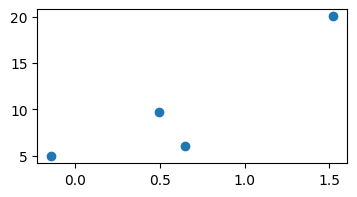

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
ml=LinearRegression()

In [8]:
ml.fit(X,y)

LinearRegression()

In [9]:
print(ml.coef_)
print(ml.intercept_)

[9.16237847]
4.392775722074516


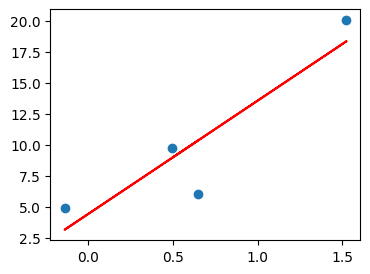

In [10]:
plt.figure(figsize=(4,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')

# Making our own Model

## Assume we already know 'm'

In [52]:
m=9.16
b=0

In [53]:
loss_function=np.sum((y-X*m-b)**2)

In [54]:
print(loss_function)

1353.60018734255


## 1 Demo Iteration

In [55]:
b=b-(2*(np.sum(y-X*m-b)))*0.1

In [56]:
b

-14.061694750905515

### b before = 0
### b after    = 14.06    
### Biggest jump!!

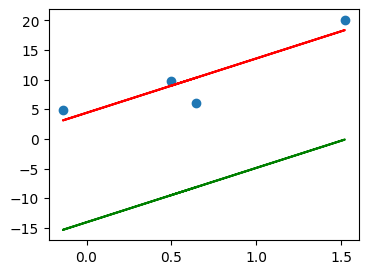

In [57]:
plt.figure(figsize=(4,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='green')

In [58]:
for i in range(15):
    b=b-(-2*(np.sum(y-X*m-b)))*0.01
    print(b)

-8.155782955525199
-4.139762934666583
-1.4088693204827254
0.44813833716229867
1.7109035443609146
2.569583885255974
3.1534865170646142
3.550540306694489
3.8205368836428044
4.004134555967658
4.128980973148559
4.213876536831572
4.271605520136021
4.310861228783046
4.337555110663023


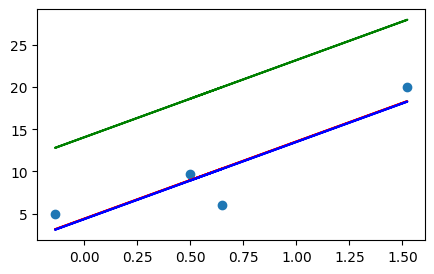

In [59]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')
plt.plot(X,X*m+14.06,color='green')

## Red line is missing?!


## NO ...Its under our Blue line!!

## Which means 'our' blue line is exact replica of 'there' red line!

## Ham Jeet Gaye !! Yeyy

# 

# Now lets assume we dont know slope too that is we dont know 'm' and 'b' both

In [60]:
b=0
m=0

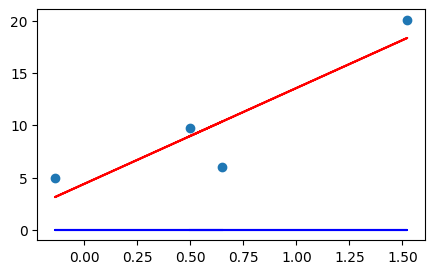

In [61]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

## Our line is completely flat..;)

In [62]:
loss_function=np.sum((y-X*m+b)**2)

In [63]:
print(loss_function)

2232.928647708146


## Slope of 'm'  w.r.t.  loss_funtion

In [64]:
slope_m=2*np.sum((y-X*m-b)*-X)

In [65]:
print(slope_m)

-206.09837741056685


In [66]:
## Update function
m=m-slope_m*0.1

In [67]:
print(m)

20.609837741056687


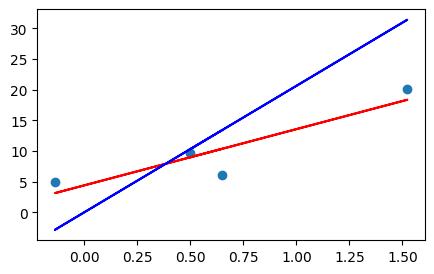

In [68]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

## Woah! now our line is somewhat prooving to be worthy..!

### Lets do one thing, first lets fit the line based on only 'm', and then with 'b' to know what happens

In [69]:
for i in range(15):
    slope_m=2*np.sum((y-X*m-b)*-X)
    m=m-(slope_m)*0.1
    print(m)

-8.325753723216867
32.298945214583355
-24.736908565167255
55.33971234384774
-57.08545167609789
100.75609260276083
-120.84868171551257
190.27774716618018
-246.53438852205778
366.73669413827776
-494.2774355053447
714.5604706128604
-982.61154196849
1400.1668485097573
-1945.182247540082


## You probably know whats happening..
## Instead of getting a nearly exact number like we got previously for 'b' , we are getting a value that jumps from '-'negative to '+'positive side .. and even worse the jumps are getting longer and longer each time...;))

# No worries!!

# This is a sign that our learning rate which is 0.1 now, is too high for our little rabbit.. so lets do 0.01

In [70]:
# First lets see which was last values for m and b
print(b)
print(m)

0
-1945.182247540082


## Okay now instead of setting m=0 again, lets start with current value which is -1945.18 and go to perfect value

In [71]:
for i in range(15):
    slope_m=2*np.sum((y-X*m-b)*-X)
    m=m-(slope_m)*0.01
    print(m)

-1475.5053099296456
-1118.7372935544188
-847.7352338069447
-641.8812530226035
-485.51394923071814
-366.73687432557415
-276.5134504965172
-207.97946602233725
-155.92084500606774
-116.37695969269299
-86.33930531094057
-63.522612575579984
-46.19098405480851
-33.025826831277534
-23.025533753649597


## nice.. values are convereging :)
## Lets do more iterations..

In [72]:
for i in range(15):
    slope_m=2*np.sum((y-X*m-b)*-X)
    m=m-(slope_m)*0.01
    print(m)

-15.429281013142559
-9.659144553167144
-5.276131519754665
-1.9467816188780556
0.5822025931166293
2.5032266173065727
3.9624422517941644
5.070866842595891
5.912829500106345
6.552386870562477
7.038196575370772
7.407219090297931
7.687529704053379
7.900454490497547
8.06219279956439


In [74]:
for i in range(25):
    slope_m=2*np.sum((y-X*m-b)*-X)
    m=m-(slope_m)*0.01
    print(m)

8.566972704974074
8.568482042690864
8.56962854016634
8.570499423101717
8.571160948402342
8.571663445013069
8.572045142951989
8.572335081855986
8.572555320320696
8.572722614121801
8.572849690996973
8.572946218974081
8.573019541916215
8.573075238243893
8.573117545342143
8.573149681941393
8.573174092998972
8.573192635711829
8.573206720812362
8.573217419897148
8.573225546954175
8.57323172029117
8.573236409576545
8.573239971571837
8.573242677274191


## noice..

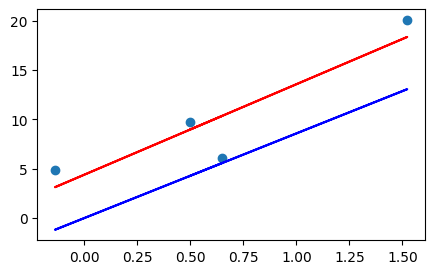

In [75]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

## Now our line is perfectly alligned with goal line
## Its just matter of intercept now

 ## Slope of 'b'  w.r.t.  loss_funtion

In [76]:
slope_b=2*np.sum((y-X*m-b)*-1)

In [77]:
print(slope_b)

-152.489011420661


In [78]:
## Update function
b=b-slope_b*0.1

In [79]:
print(m)

8.573242677274191


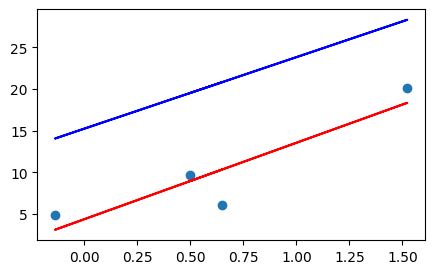

In [80]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

## Lets do iterations..

In [81]:
for i in range(15):
    slope_b=slope_b=2*np.sum((y-X*m-b)*-1)
    b=b-slope_b*0.1
    print(b)

-18.298681370479322
55.5060001571206
-106.86429920359924
250.35035938998445
-535.5218895158997
1193.3970580770456
-2610.224626627434
5757.743079722422
-12651.785874247264
27849.177824486043
-61252.94231272722
134771.72198914195
-296482.5394749703
652276.8357460769
-1434993.7897402274


## Oops..same problem..No worries ,lets just reduce the 0.1 to 0.01

In [82]:
print(b)

-1434993.7897402274


In [83]:
for i in range(25):
    slope_b=slope_b=2*np.sum((y-X*m-b)*-1)
    b=b-slope_b*0.01
    print(b)

-975794.2521332405
-663538.5665604894
-451204.7003710186
-306817.6713621784
-208634.4916361671
-141869.9294224794
-96470.02711717179
-65598.0935495626
-44605.17872358837
-30329.996641925885
-20622.872826395396
-14022.028631834663
-9533.454579533365
-6481.224223968482
-4405.707582184361
-2994.356265771159
-2034.6373706101815
-1382.028521900717
-938.2545047782808
-636.4881731350242
-431.28706761760986
-291.75031586576813
-196.8653246745157
-132.34353066446408
-88.46871073762897


In [84]:
for i in range(25):
    slope_b=slope_b=2*np.sum((y-X*m-b)*-1)
    b=b-slope_b*0.01
    print(b)

-58.633833187381086
-38.34611645321253
-24.55046907397791
-15.169428856098369
-8.79032150794028
-4.452528511192781
-1.5028292734044806
0.5029662082915634
1.8669071358448732
2.794386966581124
3.4250732514817743
3.853939925214217
4.145569263352278
4.343877213286159
4.478726619241199
4.570424215290625
4.632778580604235
4.67517954901749
4.704012207538503
4.723618415332792
4.736950636632909
4.746016547116988
4.7521813662461625
4.756373443254001
4.75922405561933


In [85]:
for i in range(25):
    slope_b=slope_b=2*np.sum((y-X*m-b)*-1)
    b=b-slope_b*0.01
    print(b)

4.761162472027754
4.762480595185483
4.763376918932739
4.763986419080872
4.764400879181603
4.7646827120501
4.764874358400679
4.765004677919071
4.765093295191579
4.765153554936884
4.765194531563691
4.7652223956699205
4.765241343262156
4.765254227624876
4.765262988991526
4.765268946720847
4.765272997976786
4.765275752830824
4.765277626131571
4.765278899976078
4.765279766190343
4.765280355216043
4.76528075575352
4.765281028119004
4.765281213327532


## Noice.. Again..:)

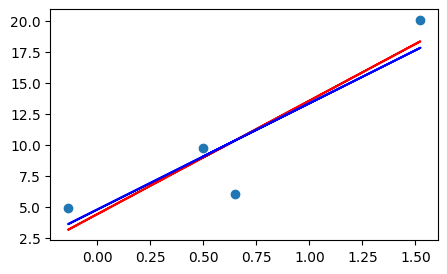

In [86]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

## Almost there..

In [87]:
for i in range(25):
    slope_b=slope_b=2*np.sum((y-X*m-b)*-1)
    b=b-slope_b*0.01
    print(b)

4.765281339269332
4.765281424909755
4.765281483145244
4.765281522745376
4.765281549673466
4.765281567984567
4.765281580436116
4.765281588903169
4.765281594660765
4.76528159857593
4.765281601238242
4.7652816030486145
4.765281604279668
4.765281605116784
4.765281605686024
4.765281606073106
4.765281606336322
4.765281606515309
4.7652816066370205
4.765281606719784
4.765281606776063
4.765281606814333
4.7652816068403565
4.765281606858053
4.765281606870086


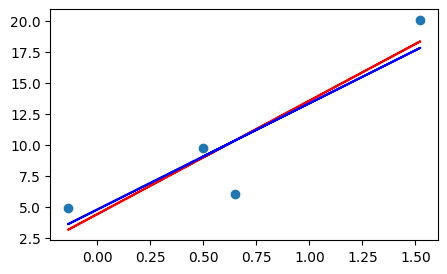

In [88]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,ml.predict(X),color='red')
plt.plot(X,X*m+b,color='blue')

In [89]:
# Its okayy 

In [90]:
# Lets see final values of m and b
print(m)
print(b)

8.573242677274191
4.765281606870086


In [91]:
# Actual values
print(ml.coef_)
print(ml.intercept_)

[9.16237847]
4.392775722074516


# I think I did good for today..:)
# I am fine for today :))